<a href="https://colab.research.google.com/github/sunc-dev/Tensorflow-ml-learning/blob/master/Tensorflow_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
##Import libraries and dependancies

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt 
import imageio
import skimage
from tensorflow import keras
from tensorflow.keras import layers
from skimage import io
from skimage import transform
from skimage import data
from skimage.color import rgb2gray
import numpy as np
import os as os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
##Define function to load traffic data

def load(path_dir):
## Load directory and check and validate if the object is a folder/directoy or not
## Assign directories into new list
  dirs = [d for d in os.listdir(path_dir)
        if os.path.isdir(os.path.join(path_dir,d))]

  print(dirs)

#Initialize image, label array
  images = []
  labels = []

#Iterate through list of directories names (labels) and save each image file name into a list that ends with .ppm

  for sd in dirs:
    label_dirs = os.path.join(path_dir, sd)
    files = [os.path.join(label_dirs, f)
              for f in os.listdir(label_dirs)
              if f.endswith(".ppm")]
    print(files)

#Iterate through the files list and append images into image array, and directory names (labels) into label array

    for f in files:
        images.append(skimage.io.imread(f))
        labels.append(int(sd))
        print(f)
     
  return images, labels  


def plot_images(s_images, traffic_signs, ctype):

  for idx, id in enumerate(traffic_signs):
    plt.subplot(1, 4, idx+1)
    plt.axis('off')
    plt.imshow(s_images[traffic_signs[idx]], cmap=ctype)
    plt.subplots_adjust(wspace=0.5)
    
    
  plots = plt.show()
  outputs = print("shape: {0}, min: {1}, max: {2}".format(s_images[traffic_signs[idx]].shape, 
                                                  s_images[traffic_signs[idx]].min(), 
                                                  s_images[traffic_signs[idx]].max()))
  return plots, outputs



  





[300, 2250, 3650, 4000]


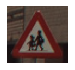

shape: (104, 112, 3), min: 9, max: 166


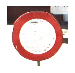

shape: (235, 241, 3), min: 4, max: 255


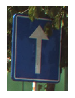

shape: (212, 153, 3), min: 5, max: 255


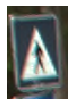

shape: (82, 54, 3), min: 13, max: 255


In [0]:
## Review features of traffic signs images

traffic_signs = [300,
                 2250,
                 3650,
                 4000]
print(traffic_signs)

for idx, id in enumerate(traffic_signs):
  plt.subplot(1, 4, idx+1)
  plt.axis('off')
  plt.imshow(images[traffic_signs[idx]])
  plt.subplots_adjust(wspace=0.5)
  plt.show()
  print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[idx]].shape, 
                                                  images[traffic_signs[idx]].min(), 
                                                  images[traffic_signs[idx]].max()))

In [0]:

ROOT_PATH = r"/content/drive/My Drive/ML/Datasets/"
train_dir= os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_dir = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load(train_dir)

print(len(set(labels)))

print(labels)


[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

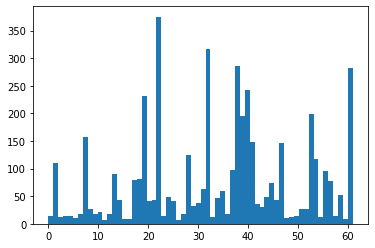

In [5]:
#plot histogram of image labels

plt.hist(labels,62)
print(labels)


[300, 2250, 3650, 4000]


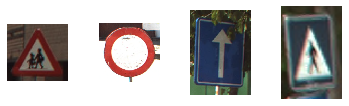

shape: (82, 54, 3), min: 13, max: 255


In [79]:
## Review features of traffic signs images

traffic_signs = [300,
                 2250,
                 3650,
                 4000]
print(traffic_signs)

plots, outputs = plot_images(images, traffic_signs, 'gray')


In [0]:
##Look at distribution of images, labels 

unique_labels = set(labels)
print(unique_labels)

plt.figure(figsize=(15,15))

i=1

for label in unique_labels:
  image = images[labels.index(label)]
  plt.subplot(8,8,i)
  plt.axis('off')
  plt.title("Label {0} ({1})".format(label, labels.count(label)))
  i += 1
  plt.imshow(image) 

plt.show()

[300, 2250, 3650, 4000]


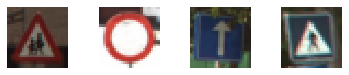

shape: (28, 28, 3), min: 0.0612044817927171, max: 0.9894957983193278


In [78]:
#Review rescaled images
imagesResc = [transform.resize(image, (28, 28)) for image in images]


traffic_signs = [300,
                 2250,
                 3650,
                 4000]

print(traffic_signs)

plots, outputs = plot_images(imagesResc, traffic_signs, 'gray')


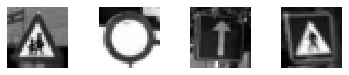

shape: (28, 28), min: 0.12229975490196075, max: 0.9776024894957984


In [73]:
#Convert images to grayscale

imagesGrey = np.array(imagesResc)
imagesGrey = rgb2gray(imagesGrey)

plots, outputs = plot_images(imagesGrey, traffic_signs, 'gray')


In [108]:
####Develope Models####

# Initialize placeholders
# define input
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
# define output
y = tf.placeholder(dtype = tf.int32, shape = [None])

model = tf.keras.Sequential([
    tf.keras.layers.Flatten()(x),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


TypeError: ignored